In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt 
from snowpack_functions import get_elev_for_lat_lon, import_gridcell_elevation

In [2]:
basin = "california"
scenario = "historical"
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data'
file = 'ensavg_%s_%s.npz' % (basin, scenario)
data = np.load(os.path.join(direc,file))
lats = data['lats']
lons = data['lons']
swe_hist = data['swe']
soil_file = '/raid9/gergel/agg_snowpack/soil_avail.txt'
elev_corr_info = import_gridcell_elevation(soil_file) 
h = np.ndarray(shape=len(lats), dtype='float')
for elev in xrange(len(lats)):
    h[elev] = get_elev_for_lat_lon(elev_corr_info, lats[elev], lons[elev])

file = 'ensavg_%s_%s.npz' % (basin, "rcp85")
data = np.load(os.path.join(direc,file))
swe_future1 = data['swe_2010_2039']
swe_future2 = data['swe_2040_2069']
swe_future3 = data['swe_2070_2099']

In [3]:
class1 = ["1970-1999" for x in range(len(lats))]
class2 = ["2010-2039" for x in range(len(lats))]
class3 = ["2040-2069" for x in range(len(lats))]
class4 = ["2070-2099" for x in range(len(lats))]

d = {'elevations': np.hstack((h, h, h, h)
                            ),'swe': np.hstack((
                            swe_hist, swe_future1, swe_future2, swe_future3)), 
                            'time_period': np.hstack((class1, class2, class3, class4))}
df = pd.DataFrame(data=d)

# TRY A VIOLINPLOT AND SEE HOW IT LOOKS # 

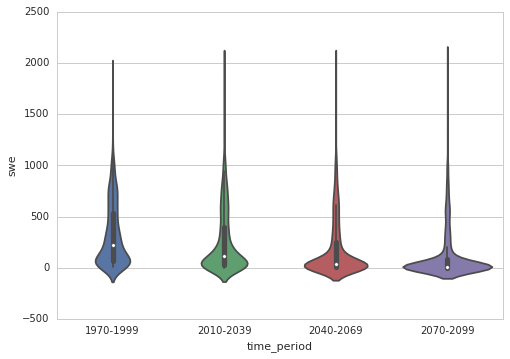

In [4]:
sns.set_style("whitegrid")
#ax = sns.violinplot(y=df['elevations'], x=df['time_period'], data=df)
ax = sns.violinplot(x="time_period", y="swe", data=df)

# TRY A SMOOTHED BAR PLOT # 

In [5]:
x = np.asarray(swe_hist)
x_sort = sorted(x)
y = h
y_sort = [y for (x,y) in sorted(zip(x,y))]
# [x for (y,x) in sorted(zip(Y,X))] # sorting X using values from Y

In [10]:
import scipy 
from scipy import signal
def smoother_interp(x,y):
    x = np.asarray(x)
    x_sort = sorted(x)
    y_sort = [y for (x,y) in sorted(zip(x,y))]
    # [x for (y,x) in sorted(zip(Y,X))] # sorting X using values from Y
    
    # first, make a function to linearly interpolate the data 
    f = scipy.interpolate.interp1d(x_sort, y_sort)

    # resample with 1000 samples
    xx = np.linspace(np.min(x_sort),np.max(x_sort), 4000)

    # compute the function on this finer interval
    yy = f(xx)

    # make a gaussian window
    window = scipy.signal.gaussian(200, 60)

    # convolve the arrays
    smoothed = signal.convolve(yy, window/window.sum(), mode='same')
    return(xx, smoothed)

# OPTIMAL RESAMPLE NUMBER # 

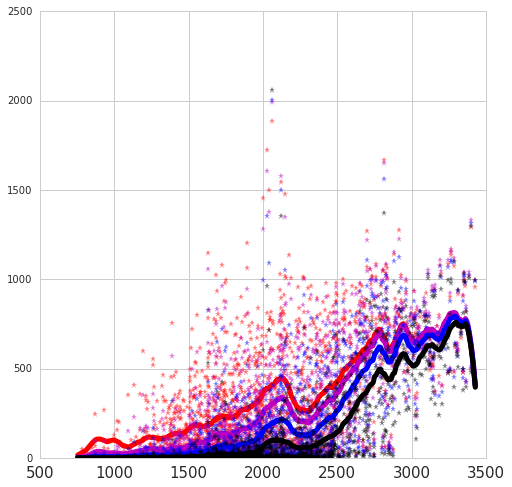

In [11]:
plt.figure(figsize=(8,8))
lw = 5.0
basin = "california"
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data'
file = 'ensavg_%s_%s.npz' % (basin, "historical")
data = np.load(os.path.join(direc,file))
lats = data['lats']
lons = data['lons']
swe_hist = data['swe']
soil_file = '/raid9/gergel/agg_snowpack/soil_avail.txt'
elev_corr_info = import_gridcell_elevation(soil_file) 
h = np.ndarray(shape=len(lats), dtype='float')
for elev in xrange(len(lats)):
    h[elev] = get_elev_for_lat_lon(elev_corr_info, lats[elev], lons[elev])

file = 'ensavg_%s_%s.npz' % (basin, "rcp85")
data = np.load(os.path.join(direc,file))
swe_future1 = data['swe_2010_2039']
swe_future2 = data['swe_2040_2069']
swe_future3 = data['swe_2070_2099']

xx, smoothed = smoother_interp(h,swe_hist)
plt.plot(xx,smoothed,label='1970-1999', linewidth=lw, color='r')
plt.plot(h, swe_hist,'r*', alpha=.5)

xx, smoothed = smoother_interp(h, swe_future1)
plt.plot(xx, smoothed, label="2010-2039", linewidth=lw, color='m')
plt.plot(h, swe_future1, 'm*', alpha=.5)

xx, smoothed = smoother_interp(h, swe_future2)
plt.plot(xx, smoothed, label="2040-2039", linewidth=lw, color='b')
plt.plot(h, swe_future2, 'b*', alpha=.5)

xx, smoothed = smoother_interp(h, swe_future3)
plt.plot(xx, smoothed, label="2070-2099", linewidth=lw, color='k')
plt.plot(h, swe_future3, 'k*', alpha=.5)



# CURVES FOR ALL MOUNTAIN RANGES # 

saving figure to '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/swe_elev_smoothed_curves.png'


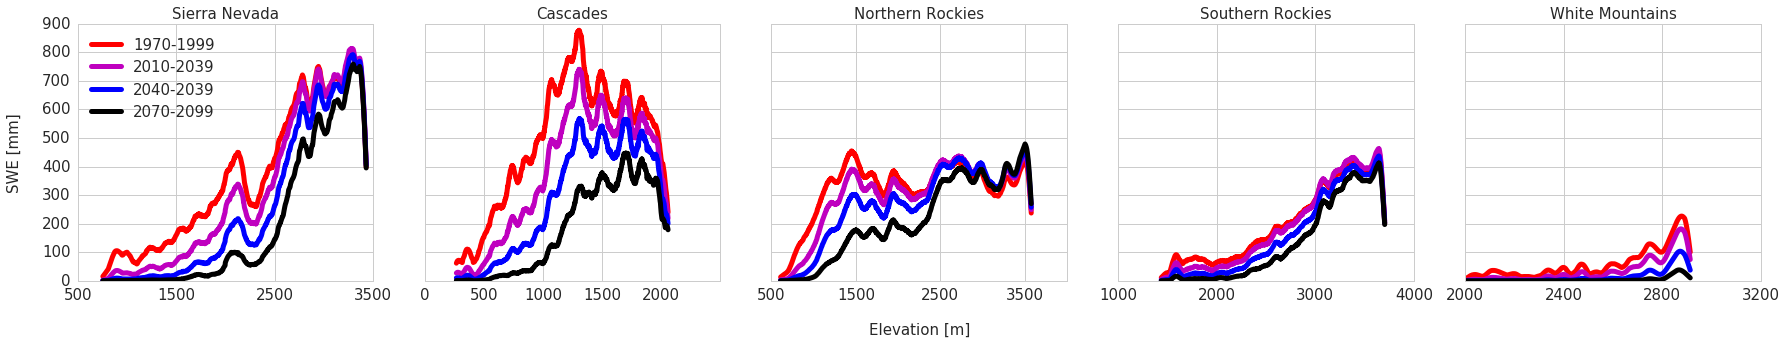

In [12]:
f, axarr = plt.subplots(1, 5, sharey=True,figsize=(25,5))
lw = 5.0
ls = 15
count = 0

plt.rcParams['xtick.labelsize'] = ls

basins = ['california','cascades','northernrockies','southernrockies','whites']
mountain_ranges = ['Sierra Nevada', 'Cascades', 'Northern Rockies', 'Southern Rockies', 'White Mountains']

for basin in basins: 
    direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data'
    file = 'ensavg_%s_%s.npz' % (basin, "historical")
    data = np.load(os.path.join(direc,file))
    lats = data['lats']
    lons = data['lons']
    swe_hist = data['swe']
    soil_file = '/raid9/gergel/agg_snowpack/soil_avail.txt'
    elev_corr_info = import_gridcell_elevation(soil_file) 
    h = np.ndarray(shape=len(lats), dtype='float')
    for elev in xrange(len(lats)):
        h[elev] = get_elev_for_lat_lon(elev_corr_info, lats[elev], lons[elev])

    file = 'ensavg_%s_%s.npz' % (basin, "rcp85")
    data = np.load(os.path.join(direc,file))
    swe_future1 = data['swe_2010_2039']
    swe_future2 = data['swe_2040_2069']
    swe_future3 = data['swe_2070_2099']

    ax = axarr[count]
    
    xx, smoothed = smoother_interp(h,swe_hist)
    ax.plot(xx,smoothed,label='1970-1999', linewidth=lw, color='r')

    xx, smoothed = smoother_interp(h, swe_future1)
    ax.plot(xx, smoothed, label="2010-2039", linewidth=lw, color='m')

    xx, smoothed = smoother_interp(h, swe_future2)
    ax.plot(xx, smoothed, label="2040-2039", linewidth=lw, color='b')

    xx, smoothed = smoother_interp(h, swe_future3)
    ax.plot(xx, smoothed, label="2070-2099", linewidth=lw, color='k')

    if count == 0:
        ax.legend(loc='upper left', prop={'size':ls})
        ax.set_ylabel('SWE [mm]', size=ls, labelpad=20)
    if count == 2: 
        ax.set_xlabel('Elevation [m]', size=ls, labelpad=20)
        
    ax.set_title(mountain_ranges[count],size=ls)
    
    if (basin == "northernrockies"):
        ax.set_xticks(np.arange(500, 4500, 1000))
    elif (basin == "southernrockies"):
        ax.set_xticks(np.arange(1000, 5000, 1000))
    elif (basin == "california"):
        ax.set_xticks(np.arange(500, 4500, 1000))
    elif (basin == "whites"):
        ax.set_xticks(np.arange(2000, 3400, 400))
    else: 
        ax.set_xticks(np.arange(0, 2500, 500))
    
    ax.tick_params(axis='x', labelsize=ls)
    ax.tick_params(axis='y', labelsize=ls)
    
    count += 1
    
plt.tight_layout()

plotname = 'swe_elev_smoothed_curves.png' 
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/'
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" %savepath)
plt.savefig(savepath)
    

# try lowess fit # 

In [16]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
w = lowess(swe_future3, h, return_sorted=True)

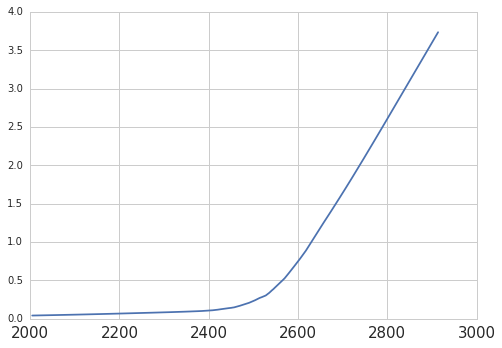

In [21]:
plt.plot(w[:,0], w[:,1])

saving figure to '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/swe_elev_smoothed_curves.png'


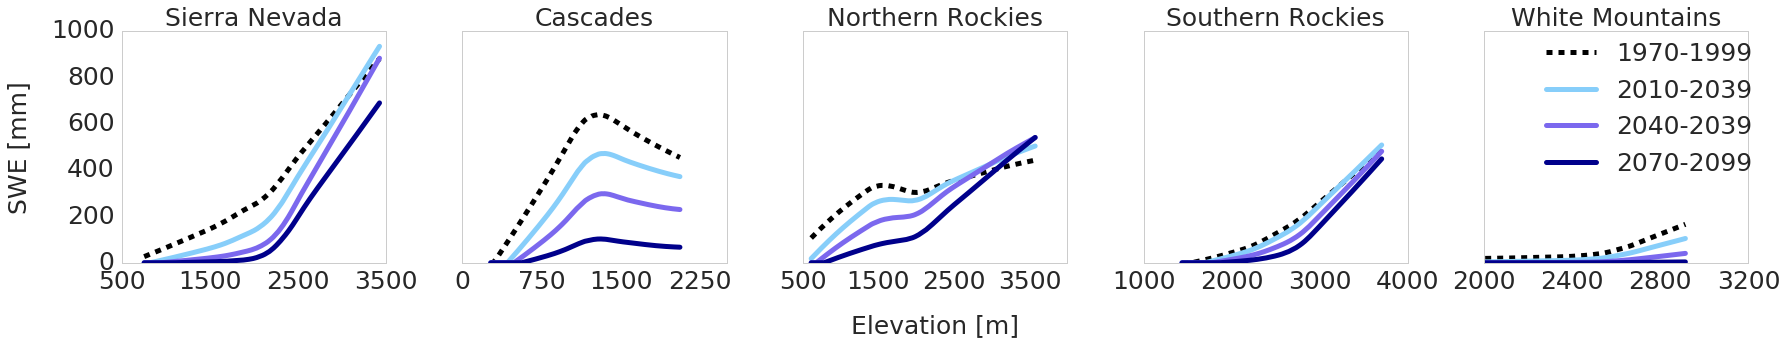

In [33]:
f, axarr = plt.subplots(1, 5, sharey=True,figsize=(25,5))
lw = 5.0
ls = 25
count = 0

plt.rcParams['xtick.labelsize'] = ls

basins = ['california','cascades','northernrockies','southernrockies','whites']
mountain_ranges = ['Sierra Nevada', 'Cascades', 'Northern Rockies', 'Southern Rockies', 'White Mountains']

for basin in basins: 
    direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/proc_data'
    file = 'ensavg_%s_%s.npz' % (basin, "historical")
    data = np.load(os.path.join(direc,file))
    lats = data['lats']
    lons = data['lons']
    swe_hist = data['swe']
    soil_file = '/raid9/gergel/agg_snowpack/soil_avail.txt'
    elev_corr_info = import_gridcell_elevation(soil_file) 
    h = np.ndarray(shape=len(lats), dtype='float')
    for elev in xrange(len(lats)):
        h[elev] = get_elev_for_lat_lon(elev_corr_info, lats[elev], lons[elev])

    file = 'ensavg_%s_%s.npz' % (basin, "rcp85")
    data = np.load(os.path.join(direc,file))
    swe_future1 = data['swe_2010_2039']
    swe_future2 = data['swe_2040_2069']
    swe_future3 = data['swe_2070_2099']

    ax = axarr[count]
    
    xx, smoothed = smoother_interp(h,swe_hist)
    w = lowess(swe_hist, h, return_sorted=True)
    x = w[:,0]
    y = w[:,1]
    y[y < 0] = 0
    ax.plot(x, y,label='1970-1999', linewidth=lw, color='k', linestyle='--')

    xx, smoothed = smoother_interp(h, swe_future1)
    w = lowess(swe_future1, h, return_sorted=True)
    x = w[:,0]
    y = w[:,1]
    y[y < 0] = 0
    ax.plot(x, y, label="2010-2039", linewidth=lw, color='lightskyblue')

    xx, smoothed = smoother_interp(h, swe_future2)
    w = lowess(swe_future2, h, return_sorted=True)
    x = w[:,0]
    y = w[:,1]
    y[y < 0] = 0
    ax.plot(x, y, label="2040-2039", linewidth=lw, color='mediumslateblue')

    xx, smoothed = smoother_interp(h, swe_future3)
    w = lowess(swe_future3, h, return_sorted=True)
    x = w[:,0]
    y = w[:,1]
    y[y < 0] = 0
    ax.plot(x, y, label="2070-2099", linewidth=lw, color='darkblue')

    if count == 0:
        ax.set_ylabel('SWE [mm]', size=ls, labelpad=20)
    if count == 2: 
        ax.set_xlabel('Elevation [m]', size=ls, labelpad=20)
    if count == 4: 
        ax.legend(loc='upper right', prop={'size':ls}, bbox_to_anchor=(1.1, 1.05))
        
    ax.set_title(mountain_ranges[count],size=ls)
    
    if (basin == "northernrockies"):
        ax.set_xticks(np.arange(500, 4500, 1000))
    elif (basin == "southernrockies"):
        ax.set_xticks(np.arange(1000, 5000, 1000))
    elif (basin == "california"):
        ax.set_xticks(np.arange(500, 4500, 1000))
    elif (basin == "whites"):
        ax.set_xticks(np.arange(2000, 3400, 400))
    else: 
        ax.set_xticks(np.arange(0, 3000, 750))
    
    ax.tick_params(axis='x', labelsize=ls)
    ax.tick_params(axis='y', labelsize=ls)
    
    ax.grid(False)
    
    count += 1
    
plt.tight_layout()

plotname = 'swe_elev_smoothed_curves.png' 
direc = '/raid9/gergel/agg_snowpack/swe_t_p_reg/plots/'
savepath = os.path.join(direc,plotname)
print ("saving figure to '%s'" %savepath)
plt.savefig(savepath)
    